In [1]:
import cv2
import numpy as np
import os
from PIL import Image as PILImage, ImageOps

from skimage.feature import hessian_matrix, hessian_matrix_eigvals
%matplotlib inline 
import matplotlib.pyplot as plt

from IPython.display import Image, display, Markdown as md
import requests
from io import BytesIO

Your image:


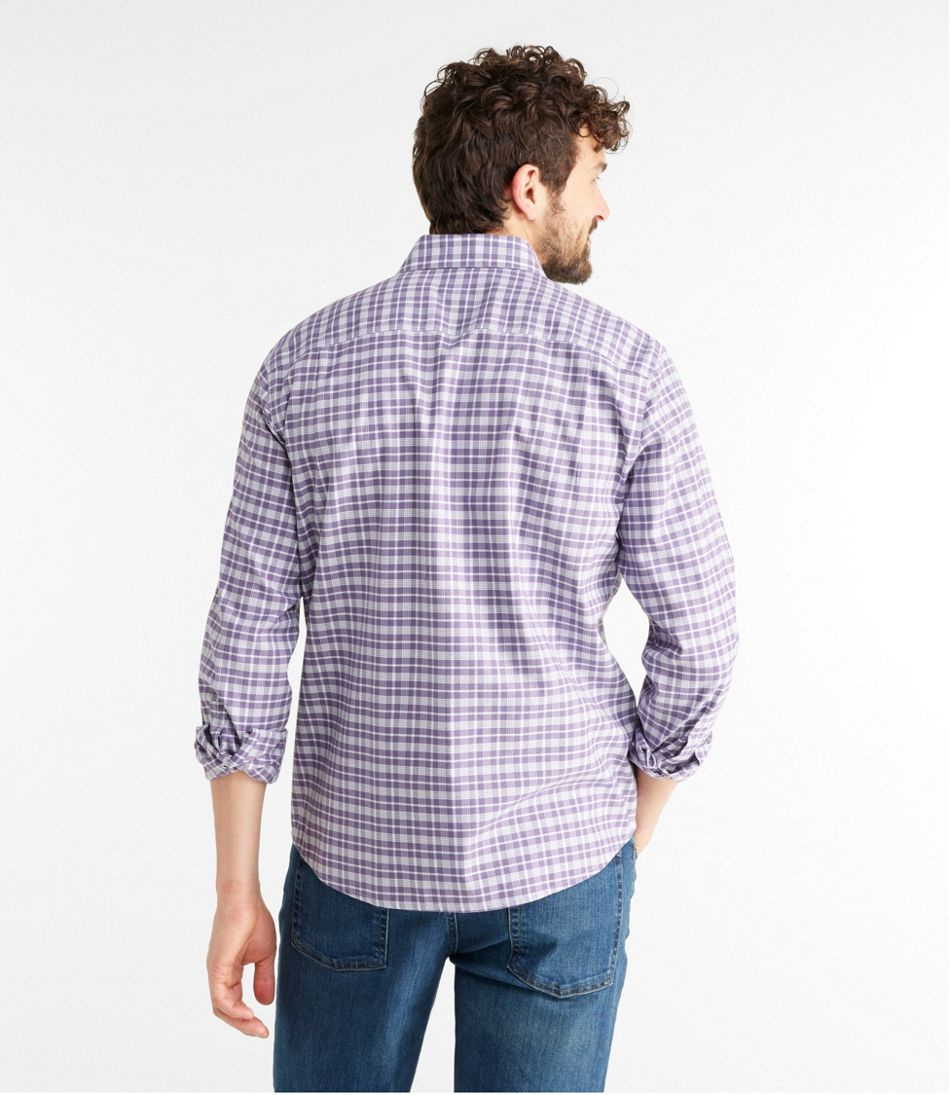

In [2]:
source_path = "sources/people_shirt.jpg"

# for imageName in listOfImageNames:
print("Your image:")
display(Image(filename=source_path))
source_img = PILImage.open(source_path).convert('L')

api_key = "bbbc910759e059eee68b1c61f659c2ad82f9aa3a0137210b0981ce46da28778cb24ed6c236abb8d4daa8421c9090b838"

test = 1 # if colored pic or complex choose 2, if simple(means got a subject) choose 1

C:\Users\Andrew\AppData\Local\Temp/ipykernel_29104/2497444875.py:4: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian = hessian_matrix(gray, sigma)


ridge detection mask:


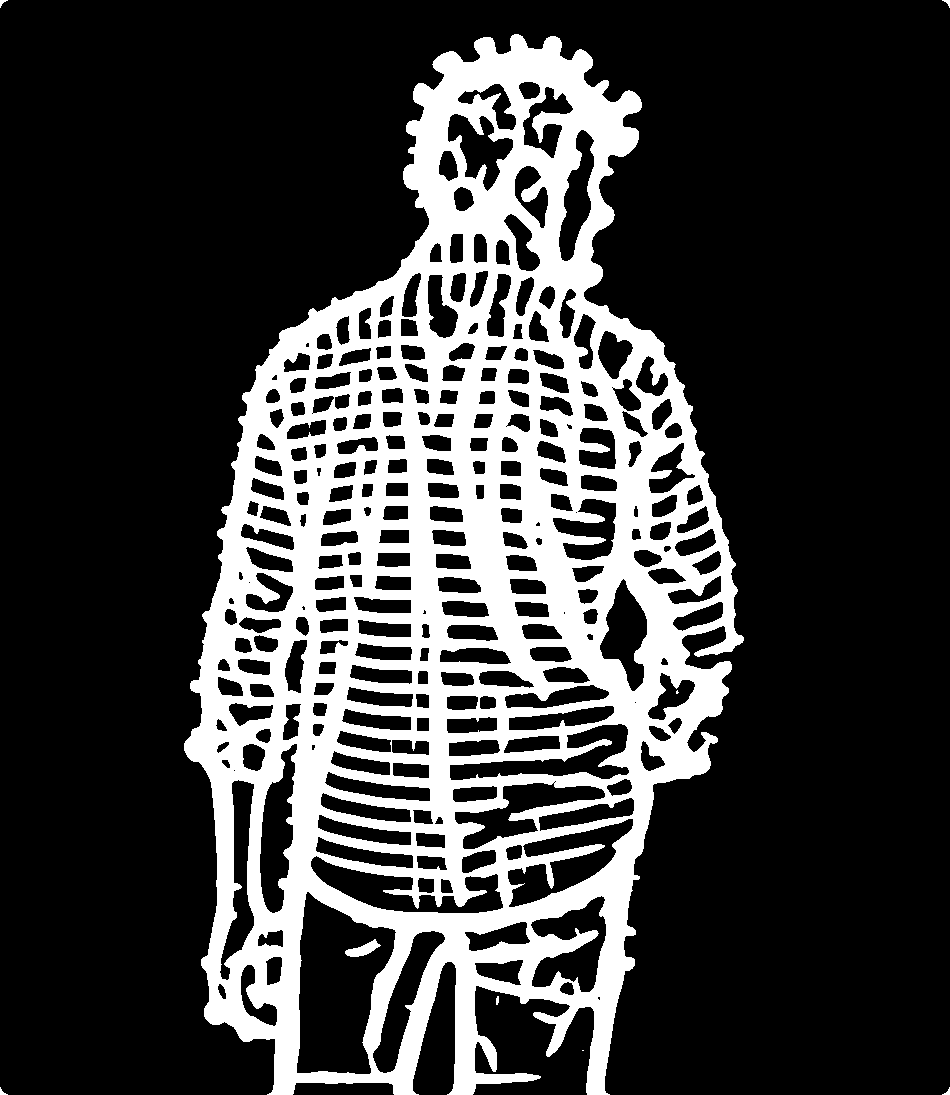

In [3]:
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

def detect_ridges(gray, sigma=2.5):
    hessian = hessian_matrix(gray, sigma)
    i1, i2 = hessian_matrix_eigvals(hessian)
    # print(i1.shape, i2.shape)
    return i1, i2

# original = "sources/foil.jpg"
# source_path = f"clean/clean_{original[8:-4]}.jpg"
ridge_detection_sigma = 7.0 #! change sigma to generate fake results
# cwd = os.getcwd()

# source_image = cv2.imread(source_path,cv2.IMREAD_GRAYSCALE|cv2.IMREAD_IGNORE_ORIENTATION)
# extract_background_grayscale2 = PILImage.fromarray(np.uint8(extract_background_grayscale))
# display(extract_background_grayscale2)
i1, i2 = detect_ridges(source_img, ridge_detection_sigma)

# # Apply a threshold to get a binary image
thresh = np.mean(i1)
i1_binary = (i1 > thresh).astype(np.uint8)

thresh = np.mean(i2)
i2_binary = (i2 > thresh).astype(np.uint8)

# # Normalize the binary images for display
i1_normalized = cv2.normalize(i1_binary, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
i2_normalized = cv2.normalize(i2_binary, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)



# Scale the images back to the range [0, 255]
i1_scaled = (i1_normalized * 255).astype(np.uint8)
i2_scaled = (i2_normalized * 255).astype(np.uint8)
ridge_mask = i1_scaled
ridge_mask = PILImage.fromarray(ridge_mask)

print("ridge detection mask:")
display(ridge_mask)

success
Removed-crease background:


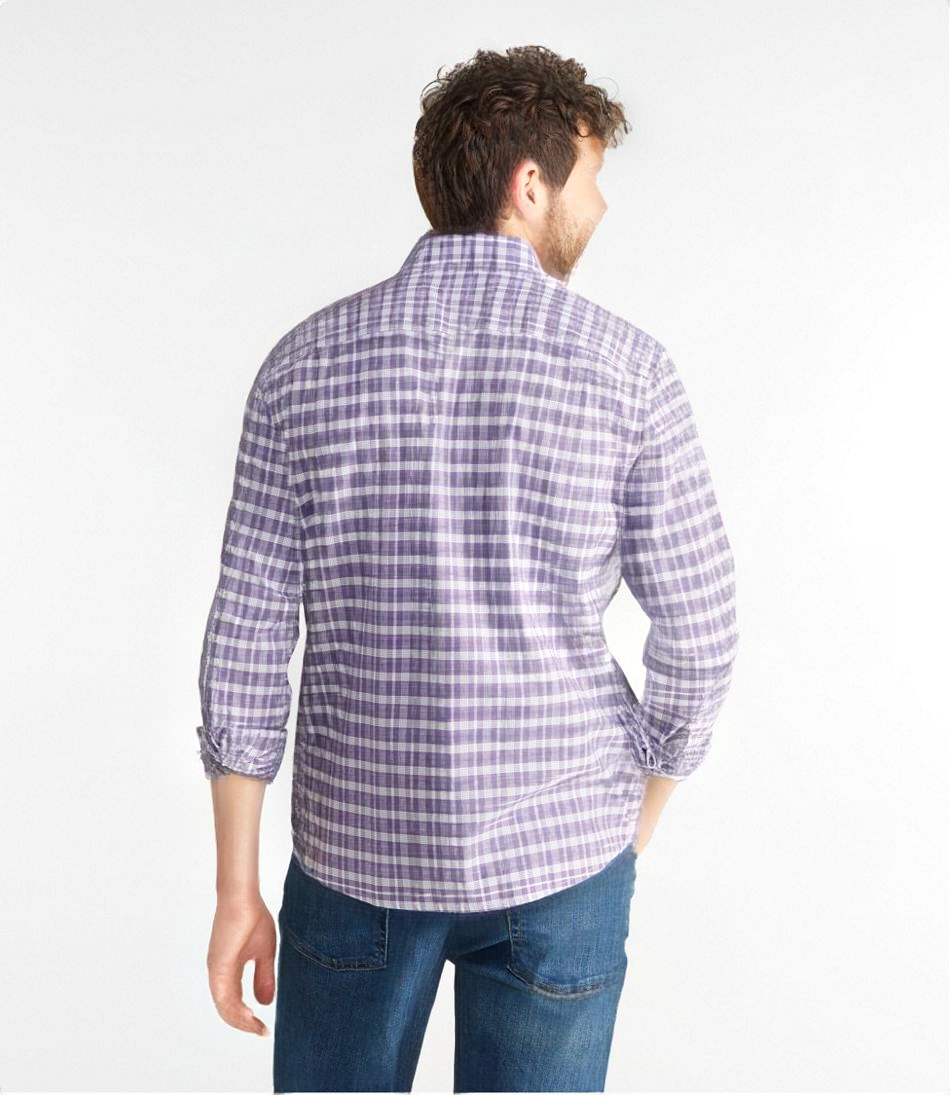

In [4]:
buf = BytesIO()
ridge_mask.save(buf, format='PNG')
mask_file_object = buf.getvalue()

with open(source_path, 'rb') as image_file_object:
    # print("sending request",image_file_object,mask_file_object)
    r = requests.post('https://clipdrop-api.co/cleanup/v1',
    files = {
        'image_file': ('image.jpg', image_file_object, 'image/jpeg'),
        'mask_file': ('mask.png', mask_file_object, 'image/png')
        },
    headers = { 'x-api-key': api_key}
    )

    if (r.ok):
        print("success")
        # r.content contains the bytes of the returned image
        # with open(f"{cwd}\clean\clean_curves\clean_curves_{original[8:-4]}.jpg", 'wb') as f:
        #     f.write(r.content)
        
        print("Removed-crease background:")
        removed_crease_background = r.content
        display(Image(data=removed_crease_background))
        
        removed_crease_background = PILImage.open(BytesIO(removed_crease_background))
        # removed_crease_background_grayscale = np.asarray(removed_crease_background.convert('L'))
        
    else:
        print("failure",r.json())
        r.raise_for_status()